# Checkpoints - Part 1
## Checkpoint 1: Data Cleaning 1


In [28]:
#Load the Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Load the companies data into one data frame and name it as companies.
companies=pd.read_csv('companies.csv', engine='python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [30]:
# Load the rounds data into one data frame and name it as rounds2.
rounds2=pd.read_csv('rounds2.csv', engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [31]:
# Convert values of company_permalink of rounds2 df to lower case
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

# Table-1.1 Q1:How many unique companies are present in rounds2?

rounds2['company_permalink'].nunique()

66368

In [32]:
# Convert values of permalink of companies df to lower case
companies['permalink']=companies['permalink'].str.lower()

#Table-1.1 Q2: How many unique companies are present in companies?
companies['permalink'].nunique()

66368

In [33]:
#Table-1.1 Q4: Are there any companies in the rounds2 file which are not  present in companies ? Answer : N.
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [34]:
# Check null values in in df companies once
companies.isnull().sum()


permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [35]:
# Check null values in in df rounds2
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [36]:
# As there are no misisng values in the permalink of df companies or company_permalink columns of df rounds2, 
#let's merge the two dataframes called as master_frame dataframe and work on it.

#Table-1.1 :Merge the two data frames and Name the merged frame master_frame.
master_frame=pd.merge(companies,rounds2,how="inner",left_on='permalink',right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [37]:
# Check the information of new df master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [38]:
# Since columns company_permalink and permalink are the same, let's remove one of them
master_frame =  master_frame.drop(['company_permalink'], axis=1)

In [39]:
# Let's check the info of df master_frame after dropping redundant column
master_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [40]:
#Table-1.1 Q5:How many observations are present in master_frame?
#len(master_frame.index)

master_frame[master_frame.columns[0]].count()

114949

In [41]:
# Check null values in df master_frame
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [42]:
# Calculate null values percent in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [43]:
# If we check, column funding_round_code has more than 72% missing values, hence this column can be dropped from df
master_frame = master_frame.drop(['funding_round_code'], axis=1)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [44]:
# Also the columns homepage_url, founded_at, state_code, region and city are not relevant for our EDA.
#So, let's drop these irrelevant columns also
master_frame = master_frame.drop(['homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [45]:
# Calculate null values percent in each column once again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [46]:
# Let's check stats of numeric/float datatype column raised_amount_usd

master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [47]:
# From above stats, we could see mean is ~ 10 million usd, median is ~1 million usd, min and max values have huge difference
# So it's not wise to impute with either mean or medin values. It would be wiser to drop these missing values

# Remove NaN in raised_amount_usd column
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

# Let's check stats for column raised_amount_usd again

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [48]:
# Let's analyze country_code. Let's convert it to type category
country_code_ctg = master_frame['country_code'].astype('category')

# Calculate occurence of each category
country_code_ctg.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [49]:
# Calculate percentage of each category
country_code_ctg.value_counts(normalize=True) * 100

USA    69.633478
GBR     5.632491
CAN     2.935763
CHN     2.162544
IND     1.850563
FRA     1.628361
ISR     1.530727
ESP     1.205279
DEU     1.169368
AUS     0.728330
RUS     0.659873
IRL     0.631818
SWE     0.628451
SGP     0.612740
NLD     0.597028
JPN     0.544283
ITA     0.542039
BRA     0.542039
CHE     0.490416
KOR     0.484805
CHL     0.484805
FIN     0.428693
DNK     0.352381
ARG     0.333303
BEL     0.328814
HKG     0.280558
TUR     0.219958
NOR     0.214347
BGR     0.213224
MEX     0.212102
         ...    
KHM     0.002244
DOM     0.002244
MAR     0.002244
MAF     0.002244
KWT     0.002244
NIC     0.002244
ZMB     0.002244
KAZ     0.002244
TUN     0.002244
SOM     0.001122
SYC     0.001122
SEN     0.001122
TGO     0.001122
QAT     0.001122
UZB     0.001122
PSE     0.001122
PRY     0.001122
OMN     0.001122
DMA     0.001122
BLM     0.001122
MNE     0.001122
MKD     0.001122
BRB     0.001122
LAO     0.001122
IRN     0.001122
HND     0.001122
GRD     0.001122
GGY     0.0011

In [50]:
# Delete the rows where country code is missing or impute with USA.
#lets delete rows with missing country_codes i.e. let's not consider/ignore these rows in the dtadrame
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]

In [51]:
# Calculate null values percent in each column once again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [52]:
# Now, let's remove rows with missing category_list values
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]

In [53]:
# Calculate null values percent in each column once again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

# Checkpoint 2: Funding Type Analysis

In [54]:
# Info of master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [55]:
# Unique Values of funding_round_type
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [56]:
# Create new dataframe with 4 funding types i.e. 'angel','seed','venture' and 'private_equity'
master_frame2=master_frame.loc[master_frame['funding_round_type'].isin(['angel','seed','venture','private_equity'])]
master_frame2.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [57]:
# let's compare stats of raised_amount_usd
master_frame2['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [78]:
# Calculate mean values of 4 funding types i.e. 'angel','seed','venture' and 'private_equity' (Table 2.1 Answers)
pd.options.display.float_format = '{:.2f}'.format
master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean() 

funding_round_type
angel              971573.89
private_equity   73938486.28
seed               747793.68
venture          11724222.69
Name: raised_amount_usd, dtype: float64

In [79]:
# Calculate median values of 4 funding types i.e. 'angel','seed','venture' and 'private_equity' (Table 2.1 Answers)
master_frame2.groupby('funding_round_type')['raised_amount_usd'].median() 

funding_round_type
angel              414906.00
private_equity   20000000.00
seed               300000.00
venture           5000000.00
Name: raised_amount_usd, dtype: float64

#### Conclusion: From above, mean is 9.5 million usd and median is 2 million usd, this huge difference could be due to presence of outliers. Hence, let's choose median over mean as the most representative value  

# Checkpoints - Part 2
## Checkpoint 3: Country Analysis

In [80]:
# Create new dataframe with funding types venture'
master_frame_vent=master_frame2.loc[master_frame2['funding_round_type'].isin(['venture'])]
master_frame_vent.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00


In [81]:
# Verify the unique values in funding_round_type
master_frame_vent['funding_round_type'].unique()

array(['venture'], dtype=object)

In [82]:
# Top nine countries which have received the highest total funding
# group by country codes and compare the total funding amounts
top9 = pd.DataFrame(master_frame_vent.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(n=9))
top9.reset_index(inplace=True)
top9.head(n=10)

,country_code,raised_amount_usd
0,USA,420068029342.00
1,CHN,39338918773.00
2,GBR,20072813004.00
3,IND,14261508718.00
4,CAN,9482217668.00
5,FRA,7226851352.00
6,ISR,6854350477.00
7,DEU,6306921981.00
8,JPN,3167647127.00


#### Conclusion: From above, we can conclude that among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Let's filter the dataframe so it contains details of only these top 3 countries.                                                          Note : We have not considered CHINA as it's not an english speaking country

In [83]:
# Create new dataframe with funding types venture'
master_frame_vent_top3=master_frame_vent.loc[master_frame_vent['country_code'].isin(['USA','GBR','IND'])]
master_frame_vent_top3.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00


In [84]:
# Check info of new df master_frame_vent_top3
master_frame_vent_top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


## Checkpoint 4: Sector Analysis 1

In [85]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [86]:
#Extract the primary sector of each category list from the category_list column
#master_frame_vent_top3['primary_sector']=master_frame_vent_top3['category_list'].str.split('|').str[0]


master_frame_vent_top3.loc[:, 'primary_sector'] = master_frame_vent_top3['category_list'].apply(lambda x: x.split("|")[0])
master_frame_vent_top3.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,Apps


In [87]:
# Let's drop category_list column
master_frame_vent_top3 = master_frame_vent_top3.drop('category_list', axis=1)
master_frame_vent_top3.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,Analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,Analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,Analytics
22,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,Apps


In [88]:
# Load the mapping data into one data frame and name it as mapping.
mapping=pd.read_csv('mapping.csv', engine='python')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [89]:
# Check null values in mapping
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [90]:
#Remove the rows with NaN values in category_list
mapping = mapping[~pd.isnull(mapping['category_list'])]

mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [91]:
# Before merging two dfs mapping and master_frame_vent_top3, let's convert category_list, primary_sector to lower case


# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
master_frame_vent_top3['primary_sector'] = master_frame_vent_top3['primary_sector'].str.lower()

In [92]:
# Values present in master_frame_vent_top3 but not in mapping
master_frame_vent_top3[~master_frame_vent_top3['primary_sector'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,analytics
61,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.00,analytics
198,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.00,analytics
199,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.00,analytics
200,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.00,analytics
256,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.00,finance
822,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.00,nanotechnology
832,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.00,analytics


In [93]:
# Values present in mapping  but not in master_frame_vent_top3
mapping[~mapping['category_list'].isin(master_frame_vent_top3['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [94]:
# replacing '0' with 'na' in category list
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [95]:
#Code for a merged data frame with each primary sector mapped to its main sector
master_frame_sector=pd.merge(master_frame_vent_top3,mapping,how="inner",left_on='primary_sector',right_on='category_list')
master_frame_sector.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,media,0,0,0,1,0,0,0,0,0


In [96]:
# let's drop the category_list column since it is the same as primary_sector
master_frame_sector = master_frame_sector.drop('category_list', axis=1)
master_frame_sector.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,0,0,0,1,0,0,0,0,0


In [97]:
# Converting wide dataframe to long

# store the value variables in one Series
value_vars = master_frame_sector.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(master_frame_sector.columns, value_vars)

print(value_vars, "\n")
print(id_vars)


Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'name' 'permalink' 'primary_sector' 'raised_amount_usd' 'status']


In [98]:
# convert wide df into long
master_frame_sector = pd.melt(master_frame_sector, id_vars=list(id_vars), value_vars=list(value_vars))

master_frame_sector.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,#fame,/organization/-fame,media,10000000.00,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,90min,/organization/90min,media,15000000.00,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,90min,/organization/90min,media,5800000.00,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,90min,/organization/90min,media,18000000.00,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,All Def Digital,/organization/all-def-digital,media,5000000.00,operating,Automotive & Sports,0


In [99]:
# Remove rows having value=0
master_frame_sector = master_frame_sector[master_frame_sector['value']==1]

# Drop value column 
master_frame_sector = master_frame_sector.drop('value', axis=1)

In [100]:
#Shape of df
master_frame_sector.shape

(38788, 10)

In [101]:
# Rename the variable as Main_Sector in df mapping_melt
master_frame_sector = master_frame_sector.rename(columns={'variable': 'main_sector'})
master_frame_sector.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,main_sector
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,3D Robotics,/organization/3d-robotics,drones,5000000.00,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,3D Robotics,/organization/3d-robotics,drones,14000000.00,operating,Automotive & Sports
25830,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,3D Robotics,/organization/3d-robotics,drones,30000000.00,operating,Automotive & Sports
25831,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,3D Robotics,/organization/3d-robotics,drones,50000000.00,operating,Automotive & Sports
25832,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,Cape Productions,/organization/cape-productions,drones,10000000.00,operating,Automotive & Sports


In [102]:
master_frame_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
country_code               38788 non-null object
funded_at                  38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
name                       38788 non-null object
permalink                  38788 non-null object
primary_sector             38788 non-null object
raised_amount_usd          38788 non-null float64
status                     38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


## Checkpoint 5: Sector Analysis 2

In [103]:
# Calculate the total number of investments and the total amount of investments in each main sector for USA
D1=master_frame_sector[(master_frame_sector['country_code'] == 'USA') & ((master_frame_sector['raised_amount_usd'] >= 5000000) & (master_frame_sector['raised_amount_usd'] <= 15000000))]
D1.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,main_sector
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,3D Robotics,/organization/3d-robotics,drones,5000000.00,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,3D Robotics,/organization/3d-robotics,drones,14000000.00,operating,Automotive & Sports
25832,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,Cape Productions,/organization/cape-productions,drones,10000000.00,operating,Automotive & Sports
25833,USA,31-03-2015,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,DroneDeploy,/organization/dronedeploy,drones,9000000.00,operating,Automotive & Sports
25836,USA,30-12-2014,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,Ehang,/organization/ehang,drones,10000000.00,operating,Automotive & Sports


In [104]:
#Calculate the total number of investments and the total amount of investments in each main sector for USA
D1.groupby(['main_sector']).raised_amount_usd.agg(['count', 'sum'])

,count,sum
main_sector,,
Automotive & Sports,167,1454104361.00
Cleantech / Semiconductors,2350,21633430822.00
Entertainment,591,5099197982.00
Health,909,8211859357.00
Manufacturing,799,7258553378.00
"News, Search and Messaging",1583,13971567428.00
Others,2950,26321007002.00
"Social, Finance, Analytics, Advertising",2714,23807376964.00


In [106]:
# Calculate the total number of investments and the total amount of investments in each main sector for GBR
D2=master_frame_sector[(master_frame_sector['country_code'] == 'GBR') & ((master_frame_sector['raised_amount_usd'] >= 5000000) & (master_frame_sector['raised_amount_usd'] <= 15000000))]
D2.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,main_sector
27368,GBR,11-05-2008,/funding-round/067d143de46ec298cfa1893682f9911a,venture,Autoquake,/organization/autoquake,automotive,11890000.00,acquired,Automotive & Sports
27369,GBR,01-07-2006,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,Autoquake,/organization/autoquake,automotive,6000000.00,acquired,Automotive & Sports
27370,GBR,01-04-2009,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,Autoquake,/organization/autoquake,automotive,5755376.00,acquired,Automotive & Sports
27371,GBR,01-04-2008,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,venture,Autoquake,/organization/autoquake,automotive,11911764.00,acquired,Automotive & Sports
27394,GBR,14-12-2014,/funding-round/76b8bfeb7ef05fb7c0be2b9a70e7d2ed,venture,Carwow,/organization/carwow,automotive,7230241.00,operating,Automotive & Sports


In [107]:
#Calculate the total number of investments and the total amount of investments in each main sector for GBR
D2.groupby(['main_sector']).raised_amount_usd.agg(['count', 'sum'])

,count,sum
main_sector,,
Automotive & Sports,16,167051565.00
Cleantech / Semiconductors,130,1163990056.00
Entertainment,56,482784687.00
Health,24,214537510.00
Manufacturing,42,361940335.00
"News, Search and Messaging",73,615746235.00
Others,147,1283624289.00
"Social, Finance, Analytics, Advertising",133,1089404014.00


In [108]:
#Calculate the total number of investments and the total amount of investments in each main sector for IND
D3=master_frame_sector[(master_frame_sector['country_code'] == 'IND') & ((master_frame_sector['raised_amount_usd'] >= 5000000) & (master_frame_sector['raised_amount_usd'] <= 15000000))]
D3.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,main_sector
27347,IND,10-04-2012,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,Ola,/organization/ani-technologies,automotive,5000000.00,operating,Automotive & Sports
27359,IND,29-05-2015,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,Ather Energy,/organization/ather-energy,automotive,12000000.00,operating,Automotive & Sports
27389,IND,27-11-2013,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,Cardekho,/organization/cardekho,automotive,15000000.00,operating,Automotive & Sports
27448,IND,11-09-2015,/funding-round/6a4ce4ed8be26c7a2d0a24f4a92fd958,venture,Incredible Technologies (CredR),/organization/incredible-technologies-pvt-ltd,automotive,15000000.00,operating,Automotive & Sports
27520,IND,18-04-2014,/funding-round/29b13629e3dd0f4d53ab84a6c89548c2,venture,TaxiForSure.com,/organization/taxiforsure-com,automotive,10000000.00,acquired,Automotive & Sports


In [109]:
#Calculate the total number of investments and the total amount of investments in each main sector for IND
D3.groupby(['main_sector']).raised_amount_usd.agg(['count', 'sum'])

,count,sum
main_sector,,
Automotive & Sports,13,136900000.00
Cleantech / Semiconductors,20,165380000.00
Entertainment,33,280830000.00
Health,19,167740000.00
Manufacturing,21,200900000.00
"News, Search and Messaging",52,433834545.00
Others,110,1013409507.00
"Social, Finance, Analytics, Advertising",60,550549550.00


In [111]:
# Table 5.1 Q1 : Total number of Investments (count) for USA
D1.raised_amount_usd.count()


12063

In [112]:
# Table 5.1 Q1 : Total number of Investments (count) for GBR
D2.raised_amount_usd.count()

621

In [113]:
# Table 5.1 Q1 : Total number of Investments (count) for IND
D3.raised_amount_usd.count()

328

In [117]:
# Table 5.1 Q2 : Total amount of Investments (sum) for USA
D1.raised_amount_usd.sum()

107757097294.0

In [118]:
# Table 5.1 Q2 : Total amount of Investments (sum) for GBR
D2.raised_amount_usd.sum()

5379078691.0

In [119]:
# Table 5.1 Q2 : Total amount of Investments (sum) for IND
D3.raised_amount_usd.sum()

2949543602.0

In [120]:
# which company received the highest investment in top sector "Others" for USA?
D1[D1['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)


name
Virtustream         64300000.00
Capella Photonics   54968051.00
Name: raised_amount_usd, dtype: float64

In [121]:
# which company received the highest investment in second best sector "Social, Finance, Analytics, Advertising" for USA?
D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

name
SST Inc. (Formerly ShotSpotter)   67933006.00
Demandbase                        63000000.00
Name: raised_amount_usd, dtype: float64

In [122]:
# which company received the highest investment in top sector "Others" for GBR?
D2[D2['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

name
Electric Cloud   37000000.00
SenSage          36250000.00
Name: raised_amount_usd, dtype: float64

In [123]:
# which company received the highest investment in second best sector "Social, Finance, Analytics, Advertising" for GBR?
D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

name
Celltick Technologies   37500000.00
myThings                34000000.00
Name: raised_amount_usd, dtype: float64

In [124]:
# which company received the highest investment in top sector "Others" for IND?
D3[D3['main_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

name
FirstCry.com   39000000.00
Myntra         38000000.00
Name: raised_amount_usd, dtype: float64

In [125]:
# which company received the highest investment in second best sector "Social, Finance, Analytics, Advertising" for IND?
D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)

name
Manthan Systems   50700000.00
Komli Media       28000000.00
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

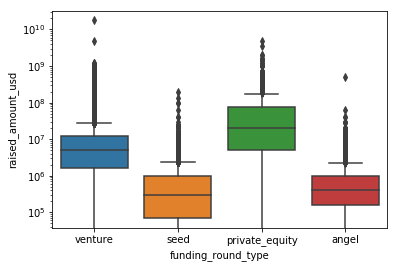

In [128]:
# Q1: A plot showing the representative amount of investment in each funding type.
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame2)
plt.yscale('log')
plt.show()


In [134]:
# Q2: A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
ES_Country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
ES_Country.head(n=10)

,country_code,English_Speaking_Flag
0,USA,Y
1,CHN,N
2,GBR,Y
3,IND,Y
4,CAN,Y
5,FRA,N
6,ISR,Y
7,DEU,N
8,JPN,N


In [136]:
top9=pd.merge(top9,ES_Country,how='inner',on='country_code')
top9

,country_code,raised_amount_usd,English_Speaking_Flag
0,USA,420068029342.00,Y
1,CHN,39338918773.00,N
2,GBR,20072813004.00,Y
3,IND,14261508718.00,Y
4,CAN,9482217668.00,Y
5,FRA,7226851352.00,N
6,ISR,6854350477.00,Y
7,DEU,6306921981.00,N
8,JPN,3167647127.00,N


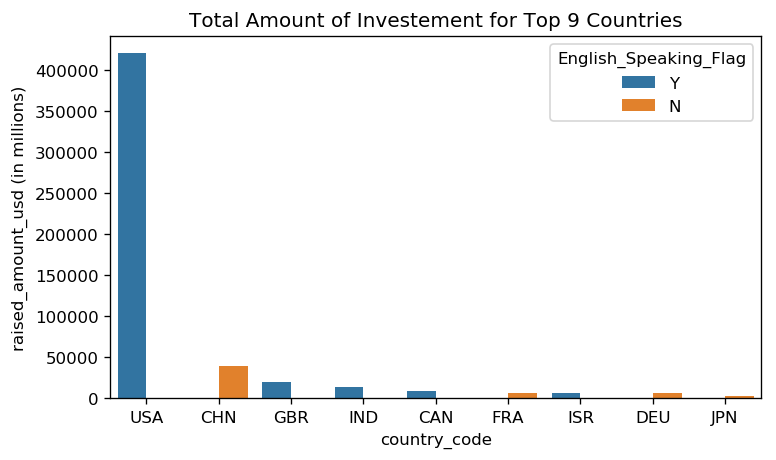

In [141]:
plt.figure(figsize=[7,4],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000,hue=top9['English_Speaking_Flag'])
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

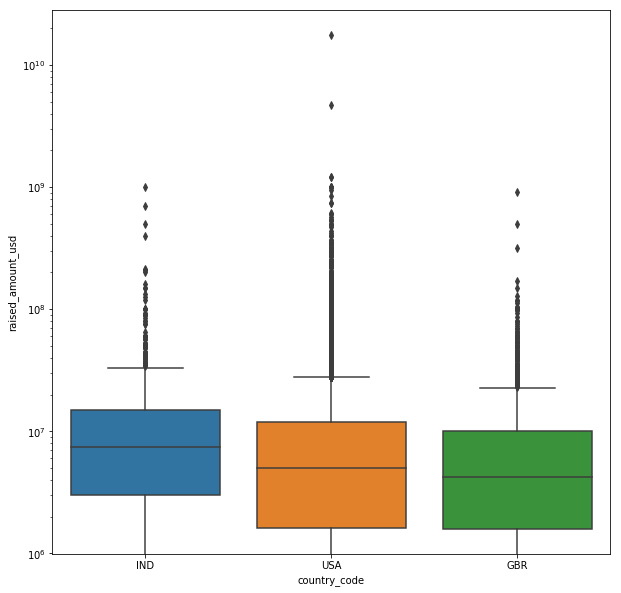

In [138]:
# A plot showing top 3 countries against total amount of investments for funding type venture
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=master_frame_vent_top3)
plt.yscale('log')
plt.show()

In [132]:
#Calculate the total number of investments and the total amount of investments in each main sector between 5M and 15M
master_frame_final=master_frame_sector[((master_frame_sector['raised_amount_usd'] >= 5000000) & (master_frame_sector['raised_amount_usd'] <= 15000000))]


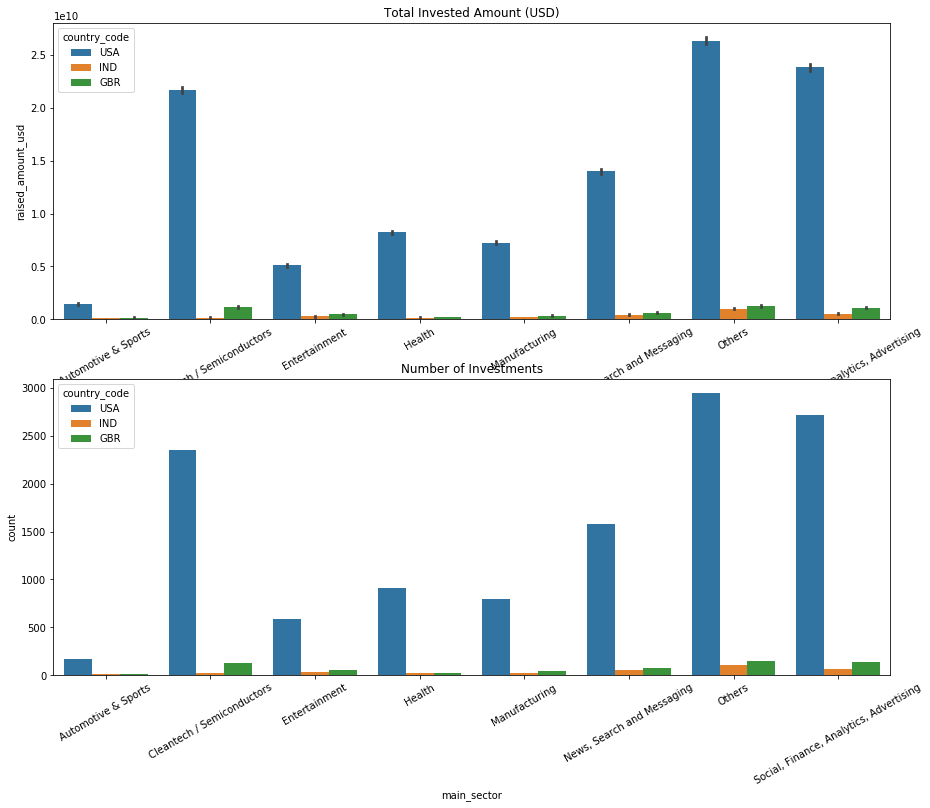

In [152]:
#Q3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).
#This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
p = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=master_frame_final, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='main_sector', hue='country_code', data=master_frame_final)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()
